In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from prml.markov import Kalman

In [2]:
frame_no = [0, 20, 40, 60, 80, 100]
observation = [[0, 1], [20, 1], [40, 1], [40, -1], [20, -1], [0, -1]]
observation = [np.array(obs, dtype=np.float) for obs in observation]

In [3]:
kalman = Kalman(
    system=np.array([[1., 1.], [0., 1.]]),
    cov_system=np.eye(2) * 0.01,
    measure=np.eye(2) * 1.,
    cov_measure=np.eye(2) * 1.,
    mu0=observation[0],
    P0=np.eye(2) * 1.
)

In [4]:
for i in range(1, frame_no[-1] + 1, 1):
    kalman.predict()
    if i not in frame_no:
        continue
    else:
        kalman.filter(observation[frame_no.index(i)])

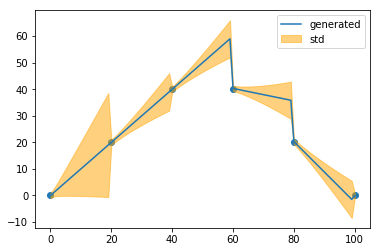

In [6]:
plt.scatter(frame_no, np.asarray(observation)[:, 0])
mean = np.asarray(kalman.hidden_mean)[:, 0]
plt.plot(mean, label="generated")
std = np.sqrt(np.asarray(kalman.hidden_cov)[:, 0, 0])
plt.fill_between(np.arange(len(mean)), mean - std, mean + std, color="orange", alpha=0.5, label="std")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

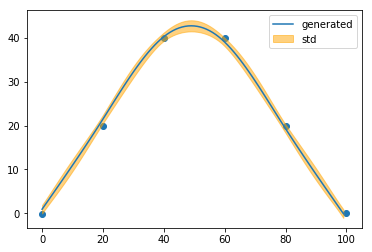

In [8]:
mean, cov = kalman.smoothing()
mean = mean[:, 0]
std = np.sqrt(cov[:, 0, 0])
plt.scatter(frame_no, np.asarray(observation)[:, 0])
plt.plot(mean, label="generated")
plt.fill_between(np.arange(len(mean)), mean - std, mean + std, color="orange", alpha=0.5, label="std")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()